In [69]:
import pygplates
import glob, re
import numpy as np
import matplotlib.pyplot as plt
import paleogeography as pg
reload(pg)

%matplotlib inline

def determine(moving_plate_id,fixed_plate_id,time_from,time_to,rotation_model):
    angle = rotation_model.get_rotation(time_to,moving_plate_id,time_from,fixed_plate_id)
    return angle.represents_identity_rotation()


def split_plate_id_list(plate_id_list,time_from,time_to,rotation_model):
    
    fixed_plate_id = plate_id_list[0]
    
    plate_id_list_copy_True = list(plate_id_list)
    plate_id_list_copy_False = list(plate_id_list)
    
    plate_id_list_copy_True[:] = [tup for tup in plate_id_list_copy_True if determine(tup,fixed_plate_id,time_from,time_to,rotation_model)]
    plate_id_list_copy_False[:] = [tup for tup in plate_id_list_copy_False if not determine(tup,fixed_plate_id,time_from,time_to,rotation_model)]

    return plate_id_list_copy_True,plate_id_list_copy_False


def get_plate_motion_groups(plate_id_list,rotation_model,time,delta_time=1.):
# given a list of plate ids, a rotation model and a time range,
# this function will determine groups of those plate ids within which 
# there is no relative motion between the plates during the specified
# time range

    time_to = time
    time_from = time+delta_time
    
    plate_group_lists = []
    list_moving = list(plate_id_list)
    
    while len(list_moving)>0:
        list_fixed,list_moving = split_plate_id_list(list_moving,time_from,time_to,rotation_model)
        plate_group_lists.append(list_fixed)
        
    return plate_group_lists


def group_features_by_motion(features,rotation_model,time,delta_time=1,plot=False):
# given a list of features, a rotation model and a time range,
# this function will make a list of all the plate_ids based on the
# features, then determine groups of those plate ids within which 
# there is no relative motion between the plates during the specified
# time range
    
    rps = []
    pygplates.reconstruct(features,rotation_model,rps,time)

    pids = []
    for rp in rps:
        pids.append(rp.get_feature().get_reconstruction_plate_id())

    pg_pids = list(set(pids))
    
    plate_group_lists = get_plate_motion_groups(pg_pids,rotation_model,time,delta_time)

    #print 'Number of groups is %d' % len(plate_group_lists)
    #for plate_group in plate_group_lists:
    #    print plate_group

    if plot:
        cmap = plt.get_cmap('hsv')
        colors = cmap(np.linspace(0, 1, len(plate_group_lists)))

        plt.figure(figsize=(20,9))
        for rp in rps:
            for (plate_group,color) in zip(plate_group_lists,colors):
                if rp.get_feature().get_reconstruction_plate_id() in plate_group:
                    plt.plot(rp.get_reconstructed_geometry().to_lat_lon_array()[:,1],
                             rp.get_reconstructed_geometry().to_lat_lon_array()[:,0],color=color)
        plt.show()   
                    
    return plate_group_lists




#plate_group_lists = get_plate_motion_groups(plate_id_list,rotation_model,time)
#
#print 'Number of groups is %d' % len(plate_group_lists)
#for plate_group in plate_group_lists:
#    print plate_group



['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/lm_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/m_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/sm_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_6Ma/i_fig64_11_2_PresentDay_Paleogeog_Matthews2016_6.00Ma.shp']


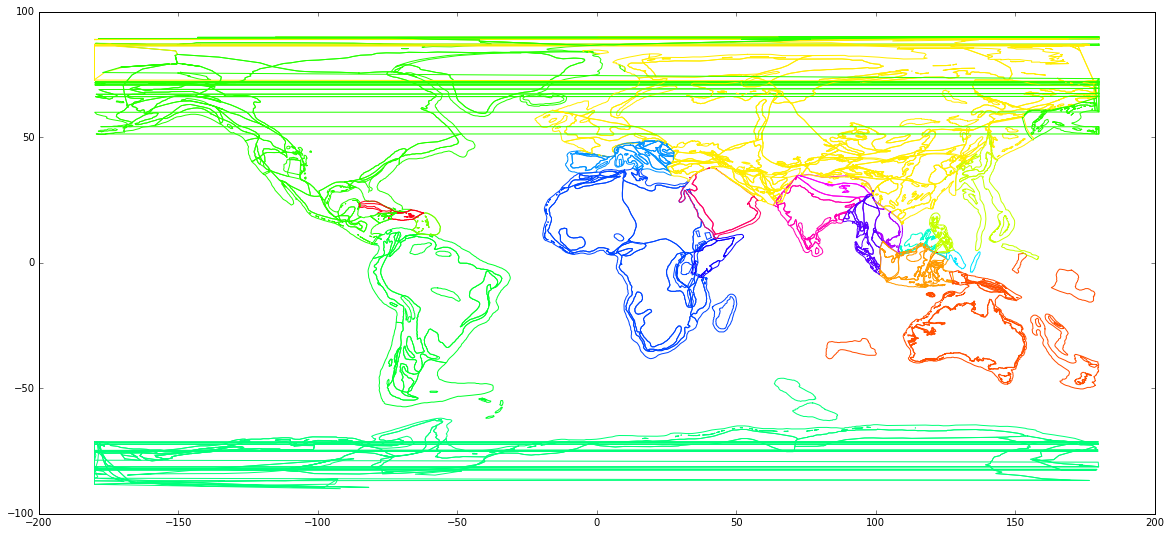

Number of groups for time 6.00 is 20
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_14Ma/lm_fig62_20_11_PresentDay_Paleogeog_Matthews2016_14.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_14Ma/m_fig62_20_11_PresentDay_Paleogeog_Matthews2016_14.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_14Ma/sm_fig62_20_11_PresentDay_Paleogeog_Matthews2016_14.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_14Ma/i_fig62_20_11_PresentDay_Paleogeog_Matthews2016_14.00Ma.shp']


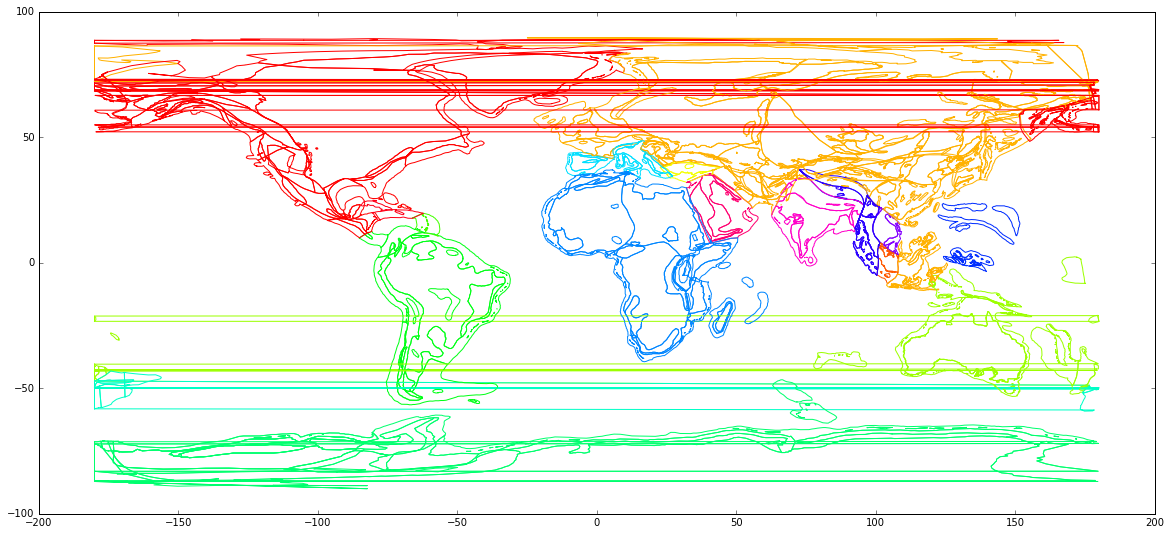

Number of groups for time 14.00 is 18
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_22Ma/lm_fig60_29_20_PresentDay_Paleogeog_Matthews2016_22.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_22Ma/m_fig60_29_20_PresentDay_Paleogeog_Matthews2016_22.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_22Ma/sm_fig60_29_20_PresentDay_Paleogeog_Matthews2016_22.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_22Ma/i_fig60_29_20_PresentDay_Paleogeog_Matthews2016_22.00Ma.shp']


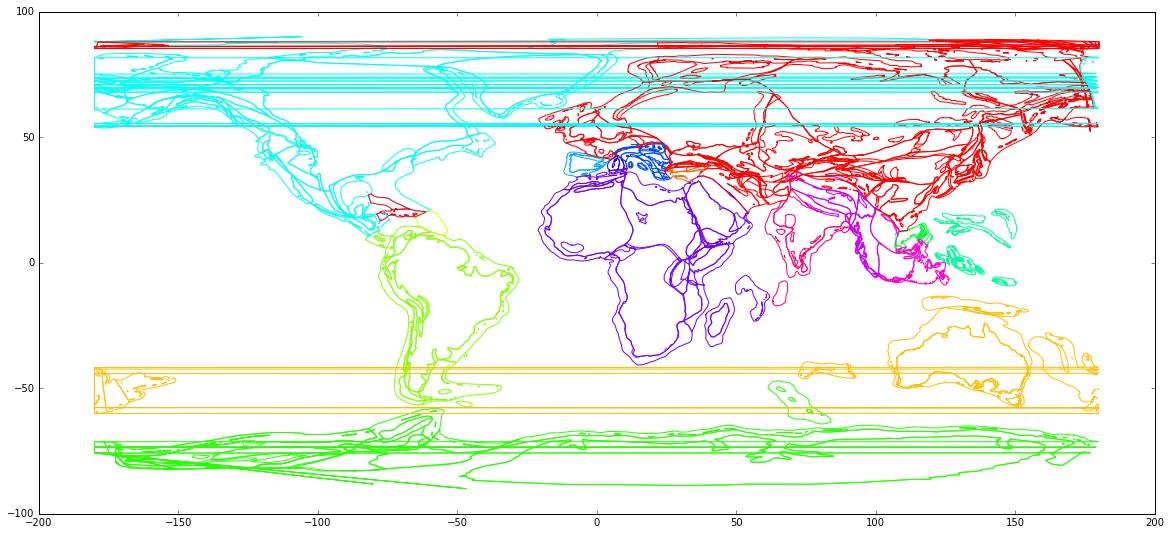

Number of groups for time 22.00 is 17
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_33Ma/lm_fig58_37_29_PresentDay_Paleogeog_Matthews2016_33.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_33Ma/m_fig58_37_29_PresentDay_Paleogeog_Matthews2016_33.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_33Ma/sm_fig58_37_29_PresentDay_Paleogeog_Matthews2016_33.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_33Ma/i_fig58_37_29_PresentDay_Paleogeog_Matthews2016_33.00Ma.shp']


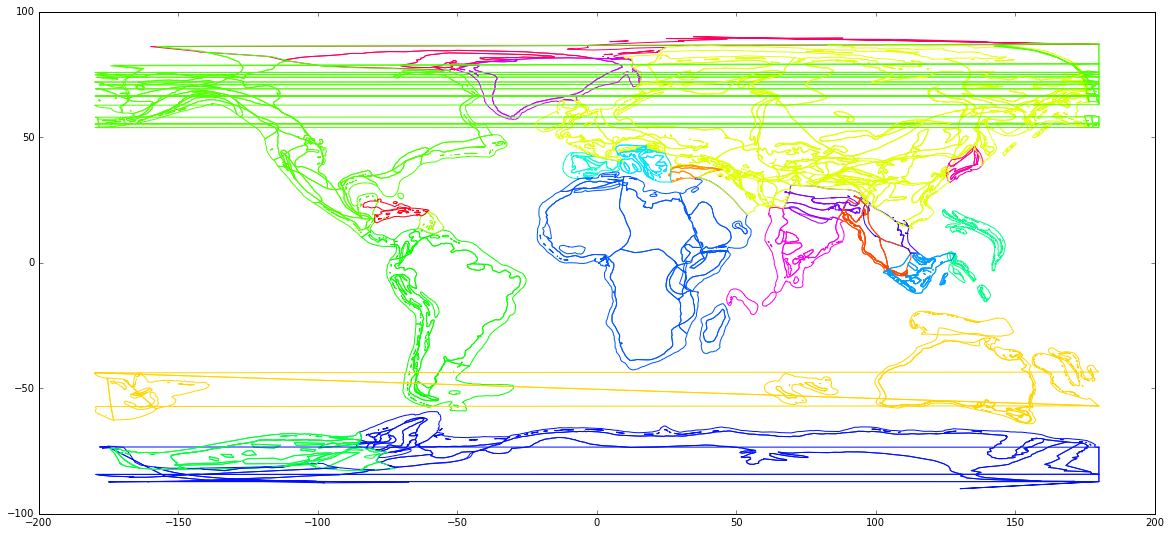

Number of groups for time 33.00 is 22
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_45Ma/lm_fig56_49_37_PresentDay_Paleogeog_Matthews2016_45.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_45Ma/m_fig56_49_37_PresentDay_Paleogeog_Matthews2016_45.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_45Ma/sm_fig56_49_37_PresentDay_Paleogeog_Matthews2016_45.00Ma.shp']
[]
no features of type i


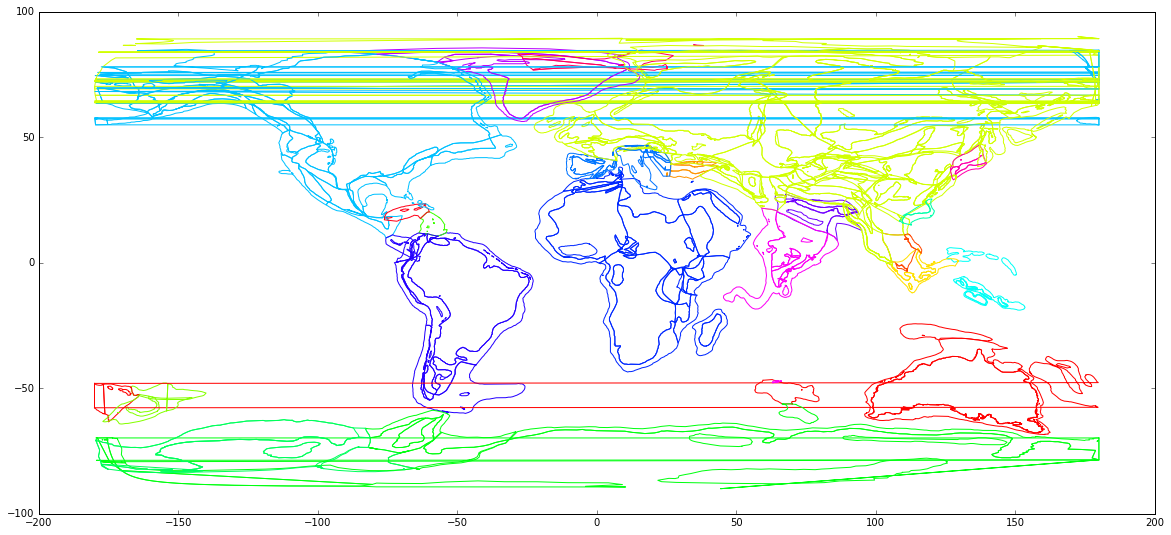

Number of groups for time 45.00 is 21
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_53Ma/lm_fig54_58_49_PresentDay_Paleogeog_Matthews2016_53.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_53Ma/m_fig54_58_49_PresentDay_Paleogeog_Matthews2016_53.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_53Ma/sm_fig54_58_49_PresentDay_Paleogeog_Matthews2016_53.00Ma.shp']
[]
no features of type i


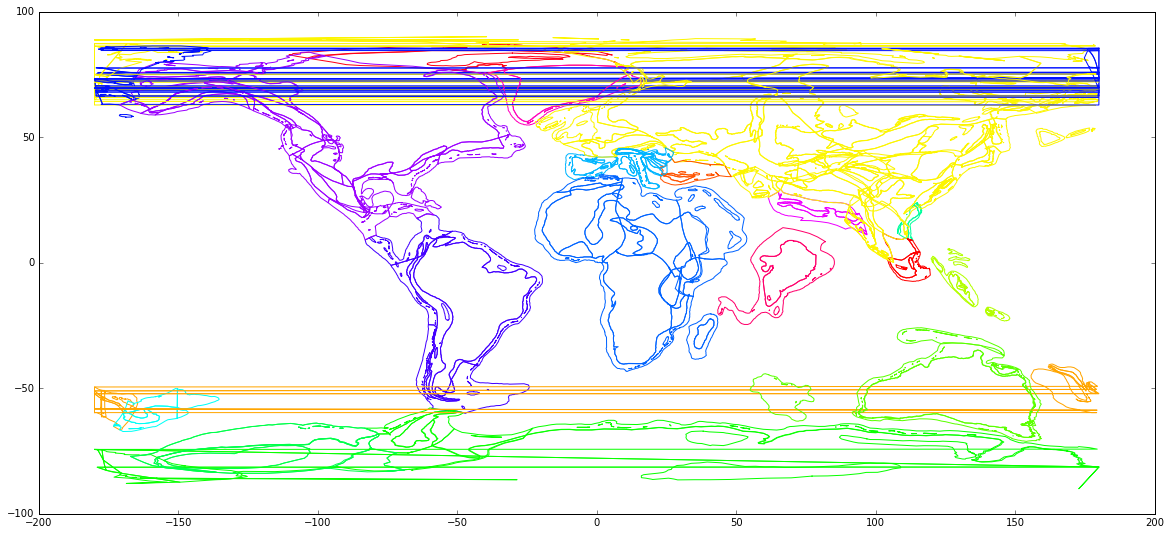

Number of groups for time 53.00 is 19
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_76Ma/lm_fig52_81_58_PresentDay_Paleogeog_Matthews2016_76.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_76Ma/m_fig52_81_58_PresentDay_Paleogeog_Matthews2016_76.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_76Ma/sm_fig52_81_58_PresentDay_Paleogeog_Matthews2016_76.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_76Ma/i_fig52_81_58_PresentDay_Paleogeog_Matthews2016_76.00Ma.shp']


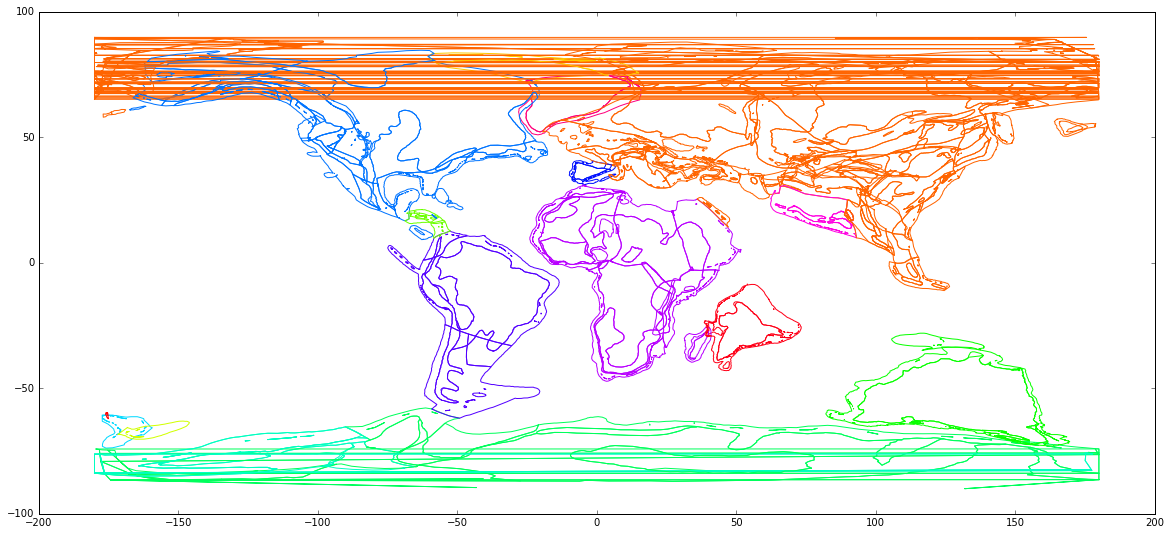

Number of groups for time 76.00 is 16
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_90Ma/lm_fig50_94_81_PresentDay_Paleogeog_Matthews2016_90.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_90Ma/m_fig50_94_81_PresentDay_Paleogeog_Matthews2016_90.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_90Ma/sm_fig50_94_81_PresentDay_Paleogeog_Matthews2016_90.00Ma.shp']
[]
no features of type i


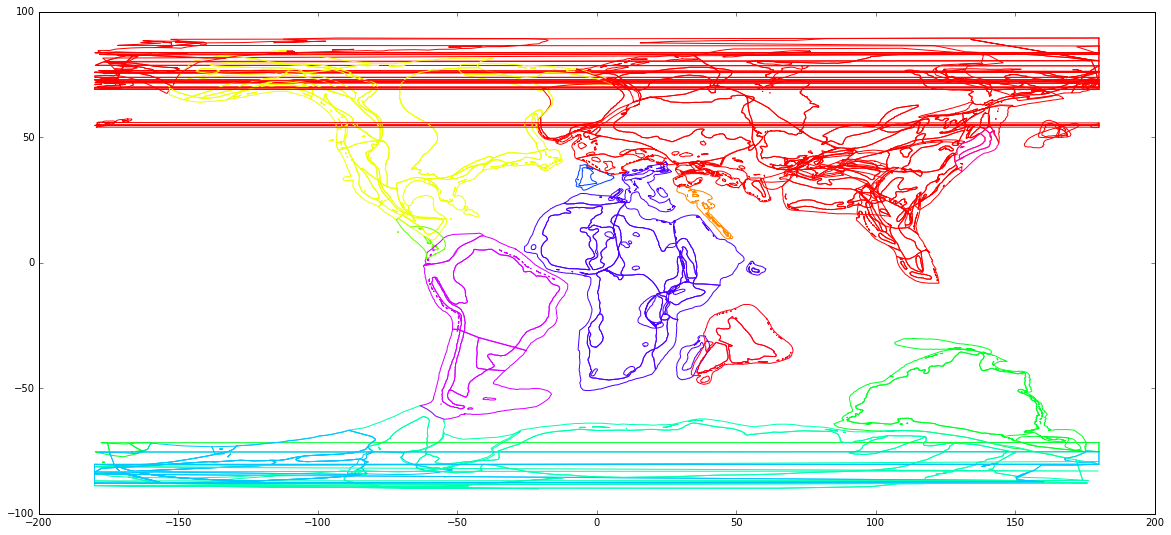

Number of groups for time 90.00 is 12
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/lm_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/m_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/sm_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
[]
no features of type i


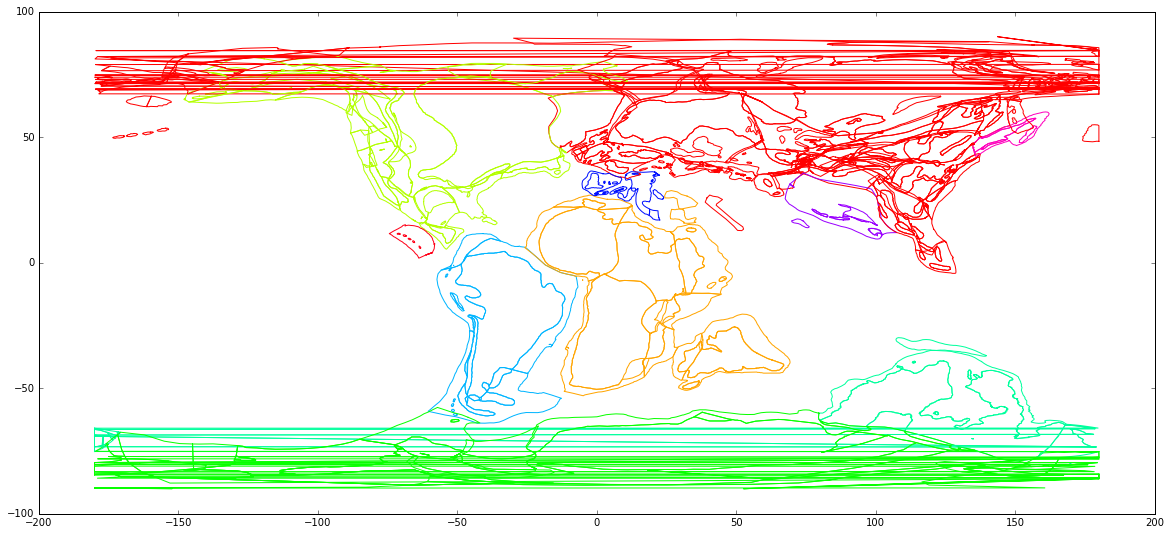

Number of groups for time 105.00 is 10
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/lm_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/m_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/sm_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
[]
no features of type i


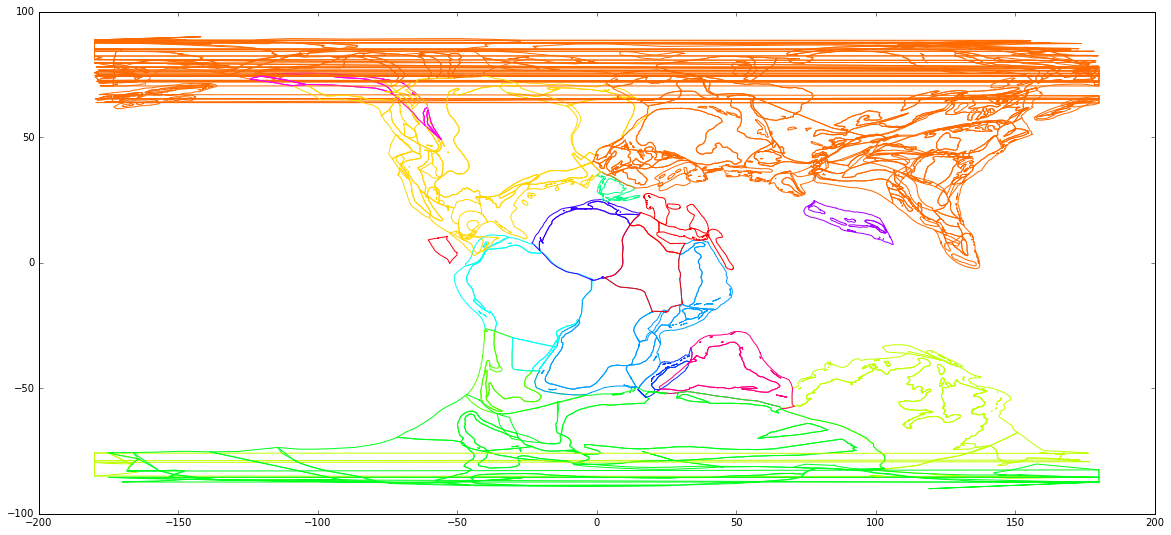

Number of groups for time 126.00 is 15
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_140Ma/lm_fig44_146_135_PresentDay_Paleogeog_Matthews2016_140.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_140Ma/m_fig44_146_135_PresentDay_Paleogeog_Matthews2016_140.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_140Ma/sm_fig44_146_135_PresentDay_Paleogeog_Matthews2016_140.00Ma.shp']
[]
no features of type i


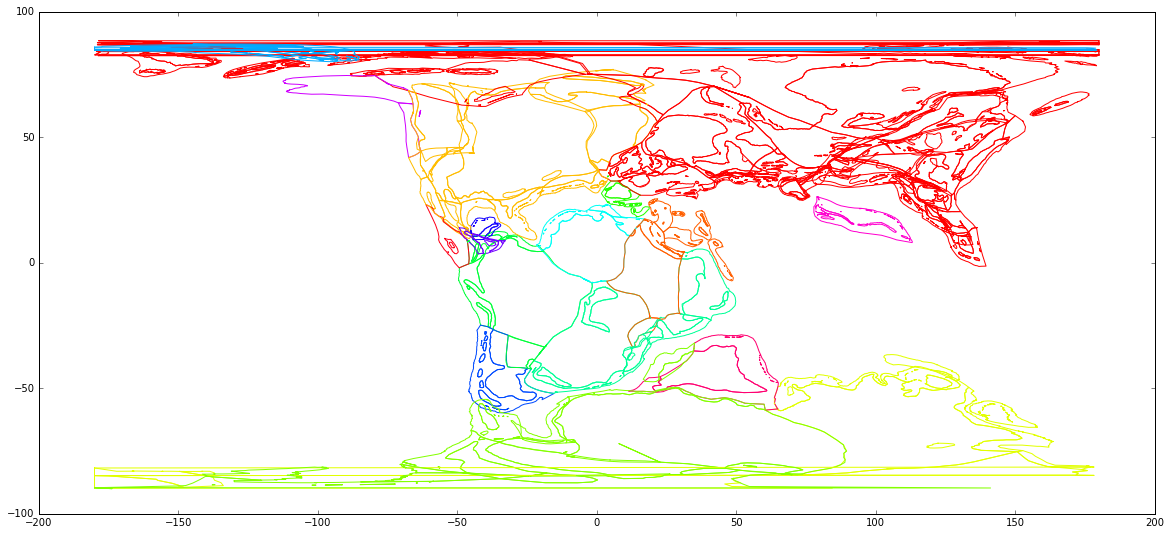

Number of groups for time 140.00 is 17
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_152Ma/lm_fig42_166_146_PresentDay_Paleogeog_Matthews2016_152.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_152Ma/m_fig42_166_146_PresentDay_Paleogeog_Matthews2016_152.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_152Ma/sm_fig42_166_146_PresentDay_Paleogeog_Matthews2016_152.00Ma.shp']
[]
no features of type i


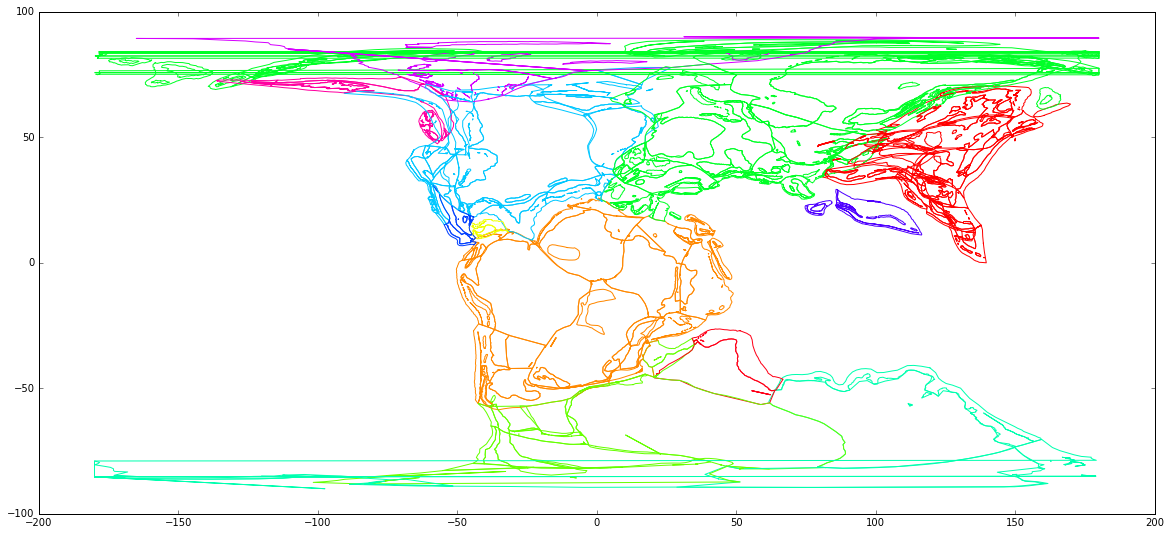

Number of groups for time 152.00 is 12
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_169Ma/lm_fig40_179_166_PresentDay_Paleogeog_Matthews2016_169.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_169Ma/m_fig40_179_166_PresentDay_Paleogeog_Matthews2016_169.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_169Ma/sm_fig40_179_166_PresentDay_Paleogeog_Matthews2016_169.00Ma.shp']
[]
no features of type i


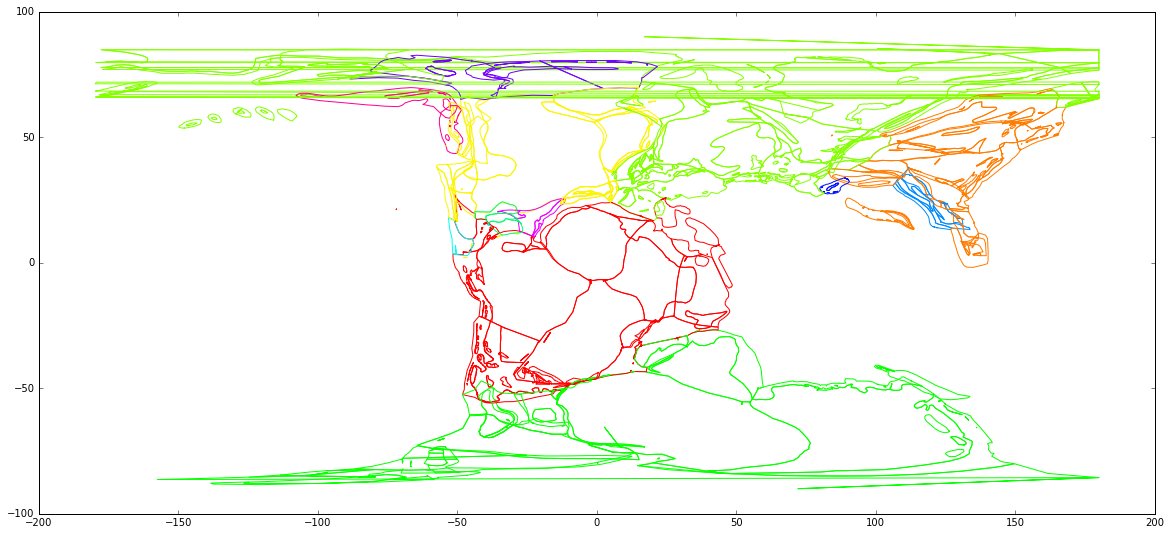

Number of groups for time 169.00 is 13
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_195Ma/lm_fig38_203_179_PresentDay_Paleogeog_Matthews2016_195.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_195Ma/m_fig38_203_179_PresentDay_Paleogeog_Matthews2016_195.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_195Ma/sm_fig38_203_179_PresentDay_Paleogeog_Matthews2016_195.00Ma.shp']
[]
no features of type i


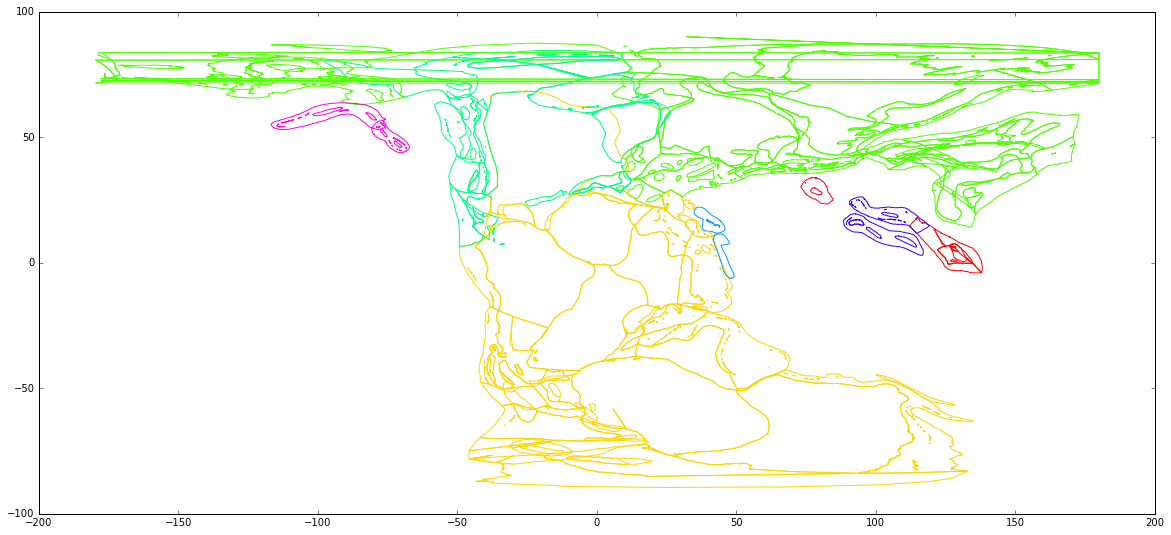

Number of groups for time 195.00 is 8
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_218Ma/lm_fig36_224_203_PresentDay_Paleogeog_Matthews2016_218.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_218Ma/m_fig36_224_203_PresentDay_Paleogeog_Matthews2016_218.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_218Ma/sm_fig36_224_203_PresentDay_Paleogeog_Matthews2016_218.00Ma.shp']
[]
no features of type i


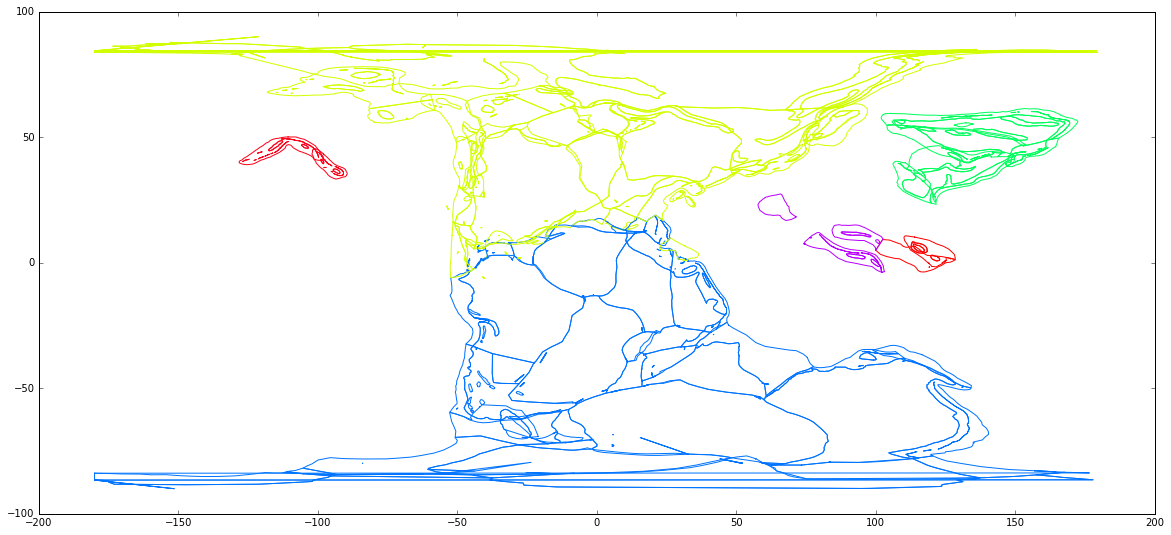

Number of groups for time 218.00 is 6
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_232Ma/lm_fig34_248_224_PresentDay_Paleogeog_Matthews2016_232.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_232Ma/m_fig34_248_224_PresentDay_Paleogeog_Matthews2016_232.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_232Ma/sm_fig34_248_224_PresentDay_Paleogeog_Matthews2016_232.00Ma.shp']
[]
no features of type i


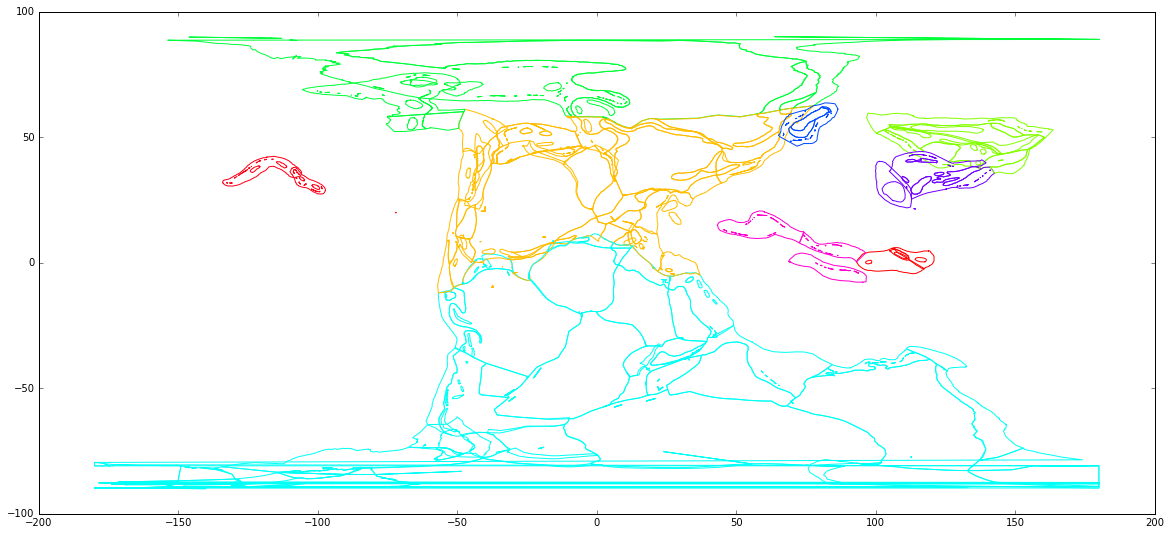

Number of groups for time 232.00 is 9
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_255Ma/lm_fig32_269_248_PresentDay_Paleogeog_Matthews2016_255.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_255Ma/m_fig32_269_248_PresentDay_Paleogeog_Matthews2016_255.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_255Ma/sm_fig32_269_248_PresentDay_Paleogeog_Matthews2016_255.00Ma.shp']
[]
no features of type i


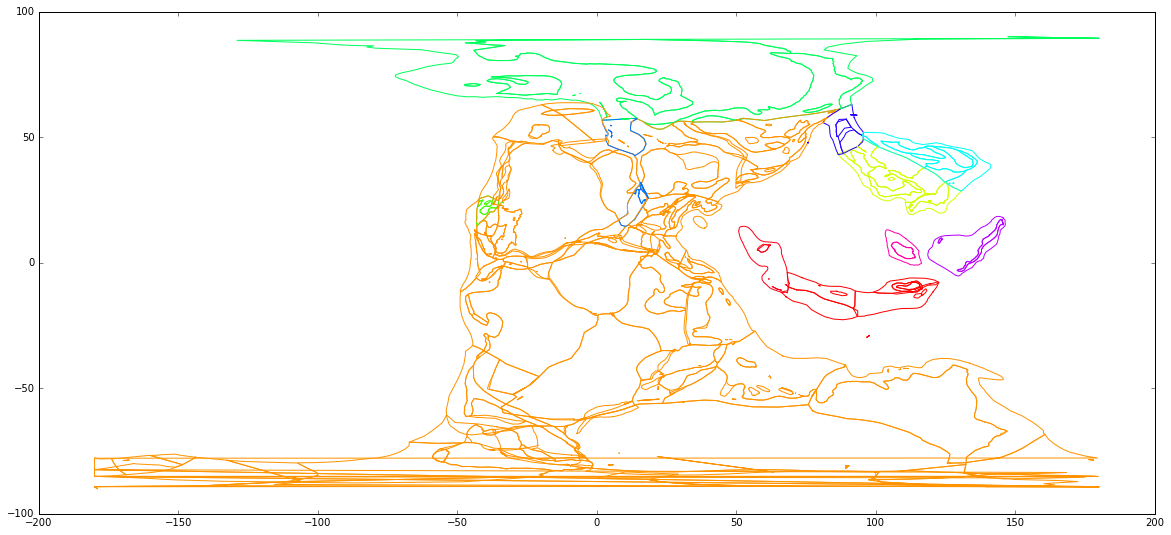

Number of groups for time 255.00 is 11
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_277Ma/lm_fig30_285_269_PresentDay_Paleogeog_Matthews2016_277.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_277Ma/m_fig30_285_269_PresentDay_Paleogeog_Matthews2016_277.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_277Ma/sm_fig30_285_269_PresentDay_Paleogeog_Matthews2016_277.00Ma.shp']
[]
no features of type i


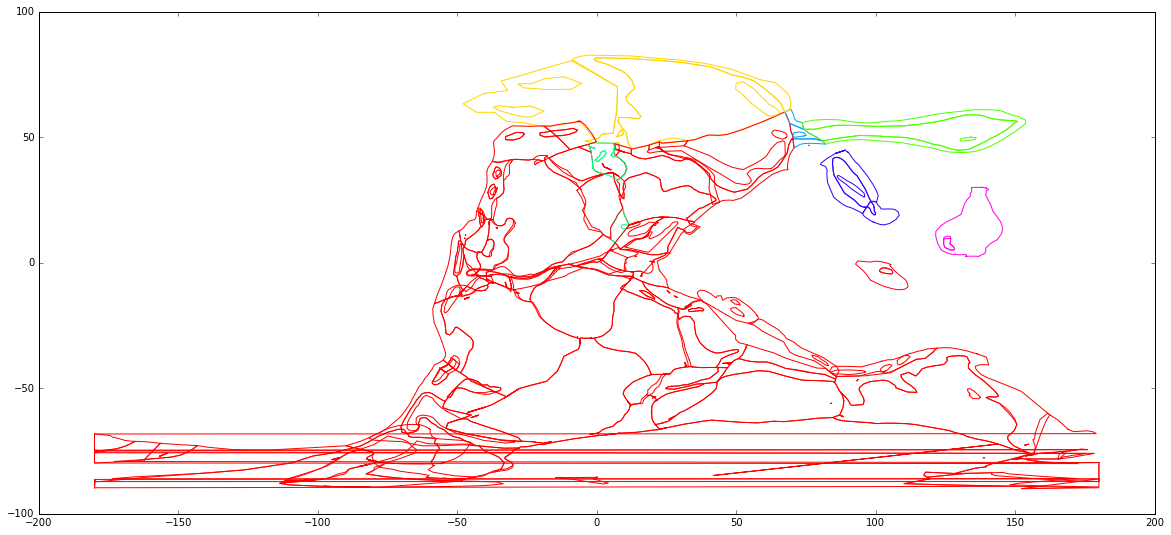

Number of groups for time 277.00 is 8
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_287Ma/lm_fig28_296_285_PresentDay_Paleogeog_Matthews2016_287.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_287Ma/m_fig28_296_285_PresentDay_Paleogeog_Matthews2016_287.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_287Ma/sm_fig28_296_285_PresentDay_Paleogeog_Matthews2016_287.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_287Ma/i_fig28_296_285_PresentDay_Paleogeog_Matthews2016_287.00Ma.shp']


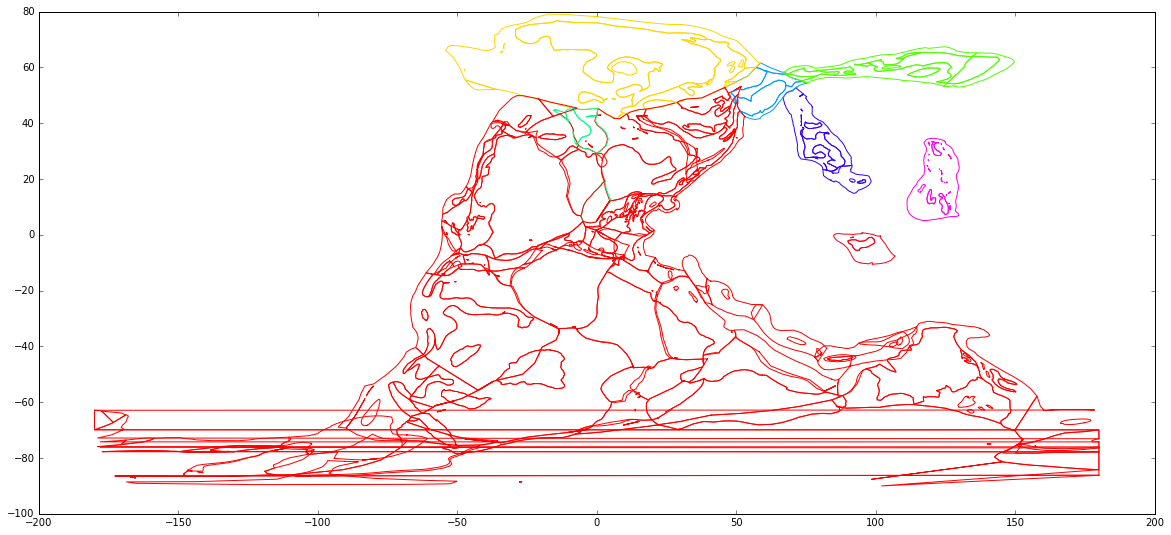

Number of groups for time 287.00 is 8
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_302Ma/lm_fig26_323_296_PresentDay_Paleogeog_Matthews2016_302.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_302Ma/m_fig26_323_296_PresentDay_Paleogeog_Matthews2016_302.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_302Ma/sm_fig26_323_296_PresentDay_Paleogeog_Matthews2016_302.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_302Ma/i_fig26_323_296_PresentDay_Paleogeog_Matthews2016_302.00Ma.shp']


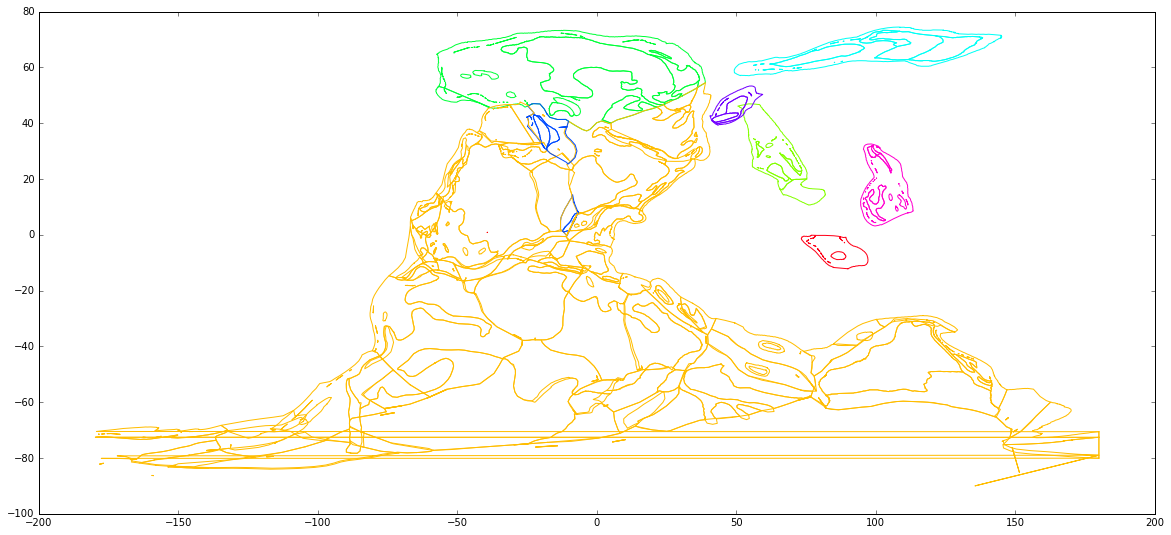

Number of groups for time 302.00 is 9
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_328Ma/lm_fig24_338_323_PresentDay_Paleogeog_Matthews2016_328.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_328Ma/m_fig24_338_323_PresentDay_Paleogeog_Matthews2016_328.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_328Ma/sm_fig24_338_323_PresentDay_Paleogeog_Matthews2016_328.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_328Ma/i_fig24_338_323_PresentDay_Paleogeog_Matthews2016_328.00Ma.shp']


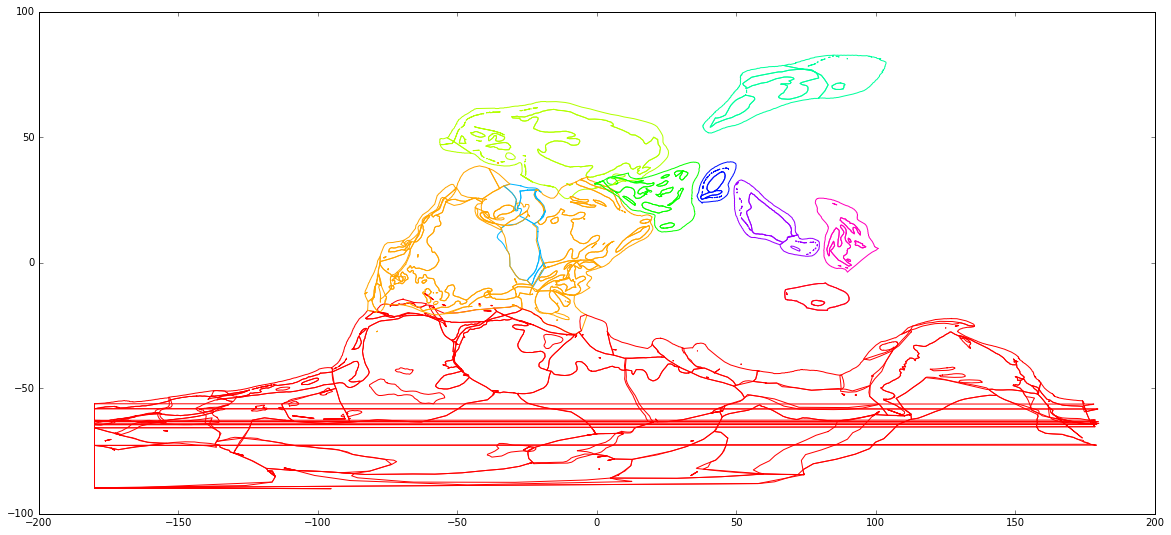

Number of groups for time 328.00 is 10
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_348Ma/lm_fig22_359_338_PresentDay_Paleogeog_Matthews2016_348.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_348Ma/m_fig22_359_338_PresentDay_Paleogeog_Matthews2016_348.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_348Ma/sm_fig22_359_338_PresentDay_Paleogeog_Matthews2016_348.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_348Ma/i_fig22_359_338_PresentDay_Paleogeog_Matthews2016_348.00Ma.shp']


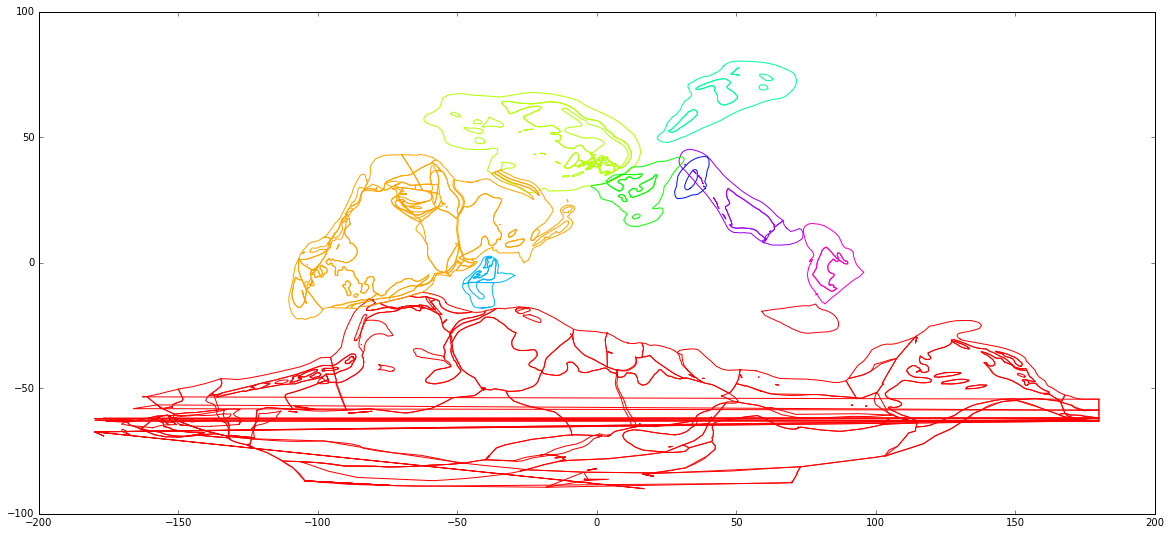

Number of groups for time 348.00 is 10
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_368Ma/lm_fig20_380_359_PresentDay_Paleogeog_Matthews2016_368.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_368Ma/m_fig20_380_359_PresentDay_Paleogeog_Matthews2016_368.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_368Ma/sm_fig20_380_359_PresentDay_Paleogeog_Matthews2016_368.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_368Ma/i_fig20_380_359_PresentDay_Paleogeog_Matthews2016_368.00Ma.shp']


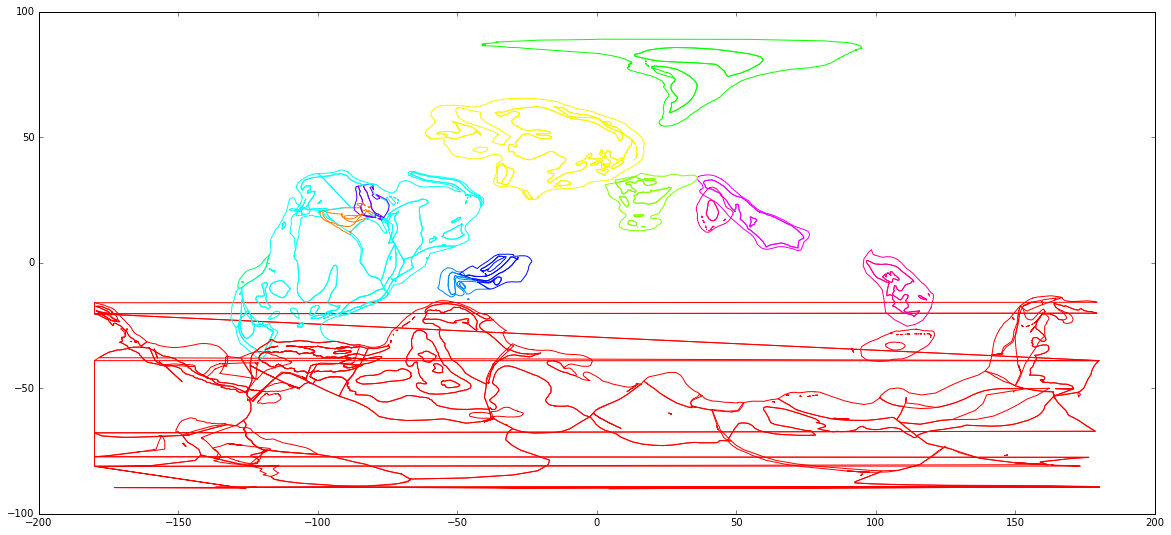

Number of groups for time 368.00 is 13
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_396Ma/lm_fig18_402_380_PresentDay_Paleogeog_Matthews2016_396.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_396Ma/m_fig18_402_380_PresentDay_Paleogeog_Matthews2016_396.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_396Ma/sm_fig18_402_380_PresentDay_Paleogeog_Matthews2016_396.00Ma.shp']
[]
no features of type i


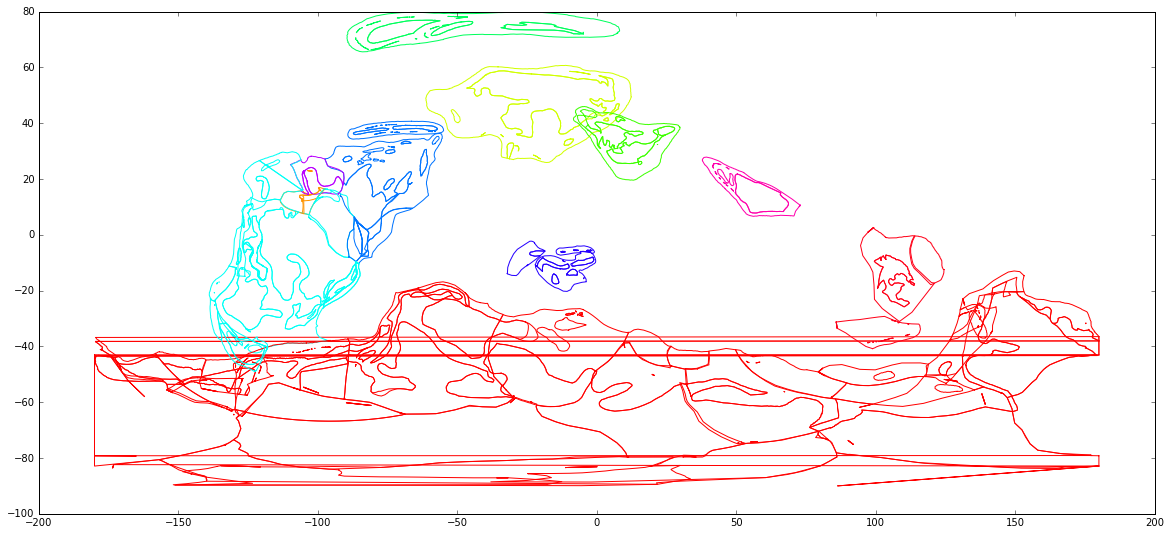

Number of groups for time 396.00 is 11


In [46]:
# This example goes through the time snapshots for which Paleogeographies exist in the Cao++2017 files,
# then gets the 'coherently moving groups' at each snapshot
# BUT
# currently this is done using a delta time of 1 Myr
# should be updated to use the delta time to the previous/next snapshot

rotation_model = pygplates.RotationModel('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')

env_list = ['lm','m','sm','i']

basedir = '/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles/'

tmp = glob.glob('%s/*/' % basedir)

time_list = []
for tm in tmp:
    time_list.append(float(re.findall(r'\d+Ma+',tm)[1][:-2]))
#time_list = [396.,368.,348.,328.,302.,287.,277.,255.,232.,218.,195.]

time_list.sort()

for time in time_list:
    pg_dir = '%s/PresentDay_Paleogeog_Matthews2016_%dMa/' % (basedir,time)
    pg_features = pg.load_paleogeography(pg_dir,env_list)
    pids = group_features_by_motion(pg_features,rotation_model,time,plot=True)
    print 'Number of groups for time %0.2f is %d' % (time,len(pids))





Working on time stage 105 to 126 Ma
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/lm_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/m_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_105Ma/sm_fig48_117_94_PresentDay_Paleogeog_Matthews2016_105.00Ma.shp']
[]
no features of type i
['/Users/Simon/Data/GPlates/PublishedModels/WCao_Paleogeography/Supplements/Paleogeography_Matthews2016_410-2Ma_Shapefiles//PresentDay_Paleogeog_Matthews2016_126Ma/lm_fig46_135_117_PresentDay_Paleogeog_Matthews2016_126.00Ma.shp']
['/Users/Simon/Data/GP

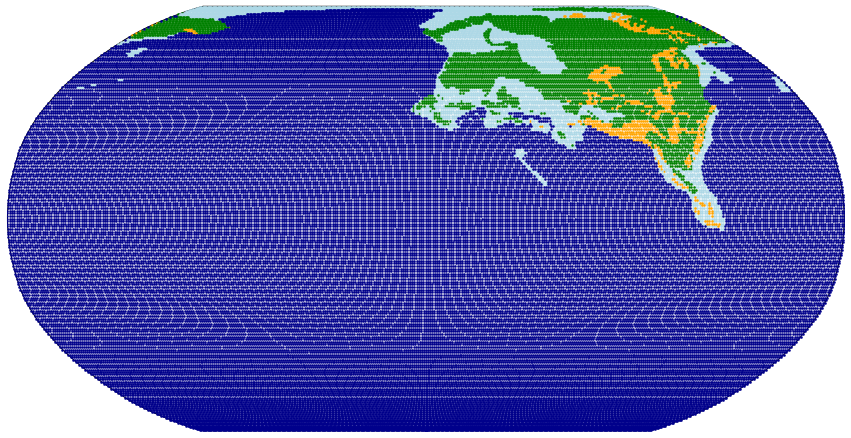

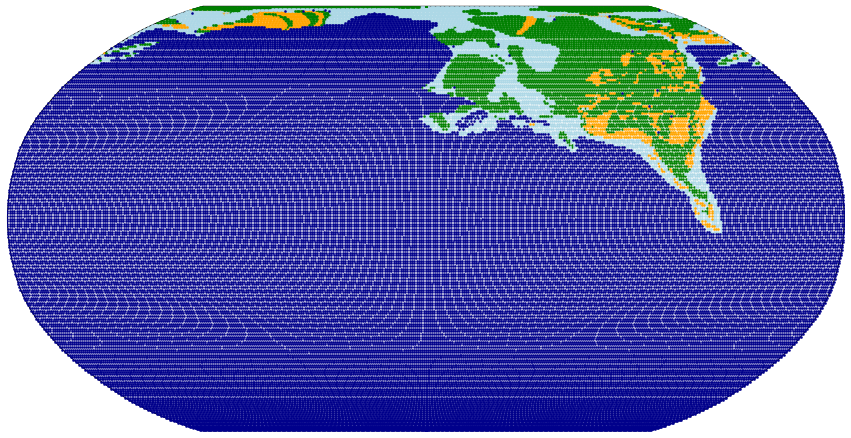

[522, 715, 525]


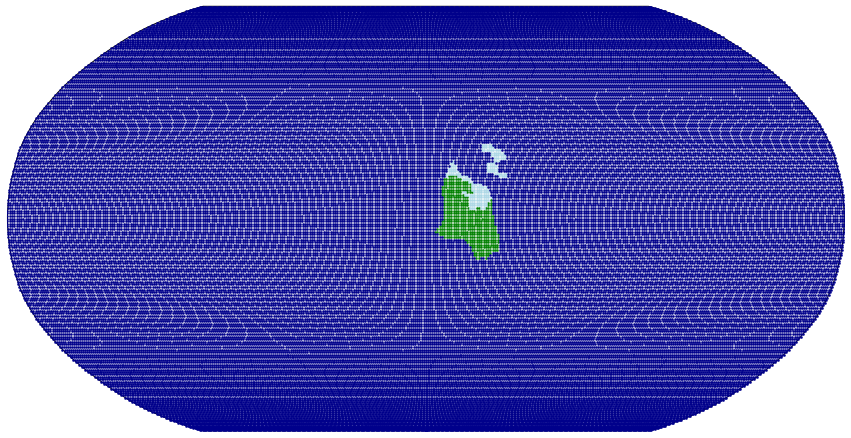

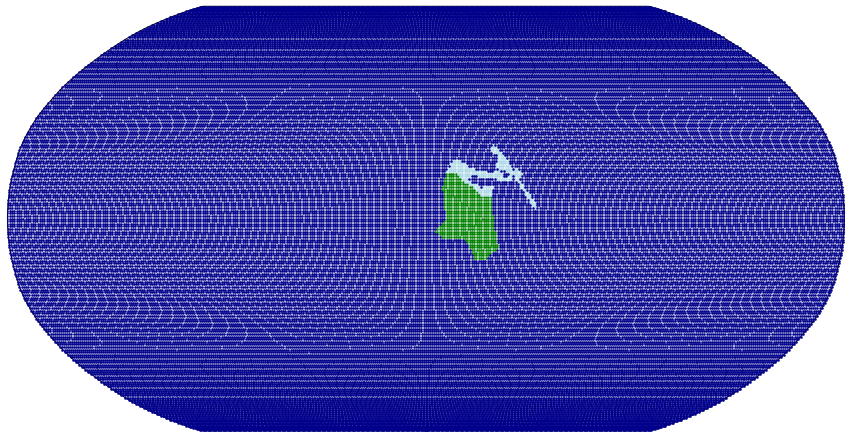

[173, 176, 205, 212, 16122, 101, 103, 233, 16111, 104, 120, 16123]


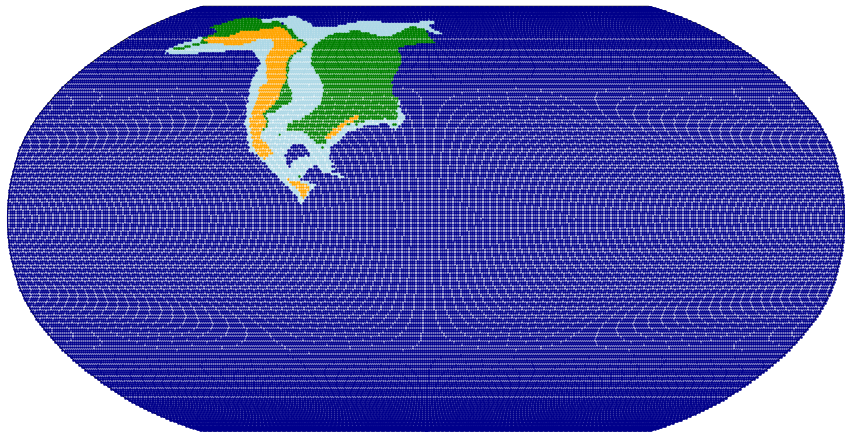

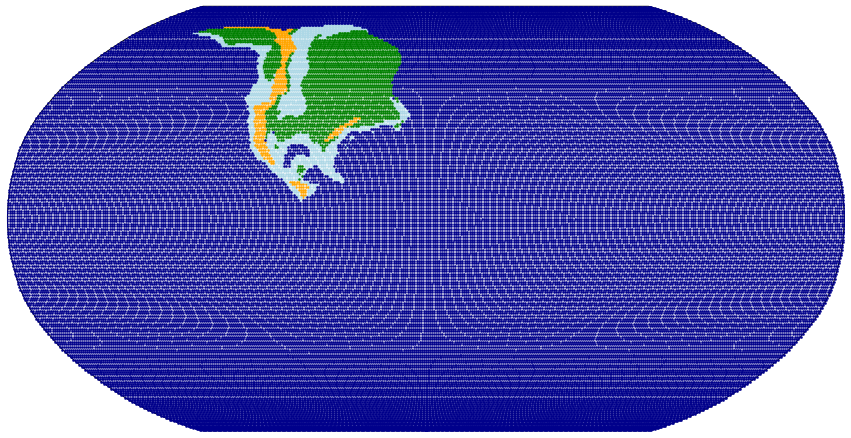

[802, 804, 813]


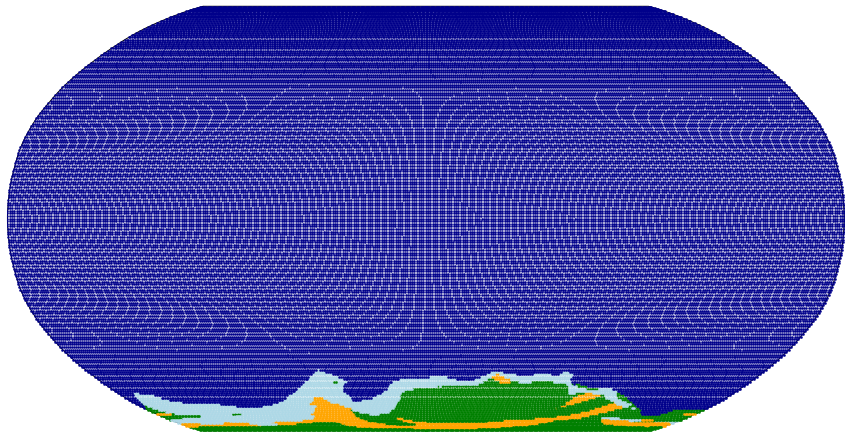

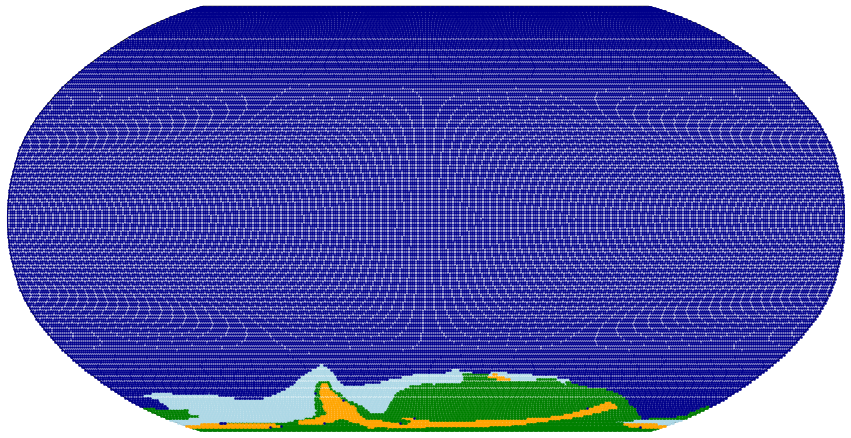

[801, 806, 615]


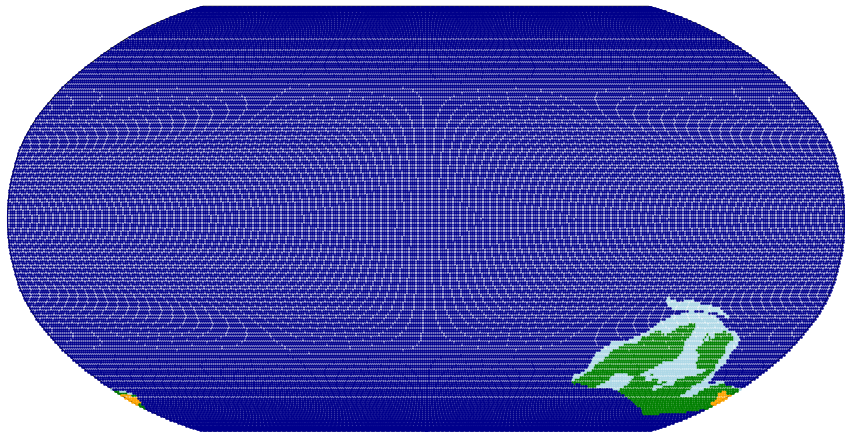

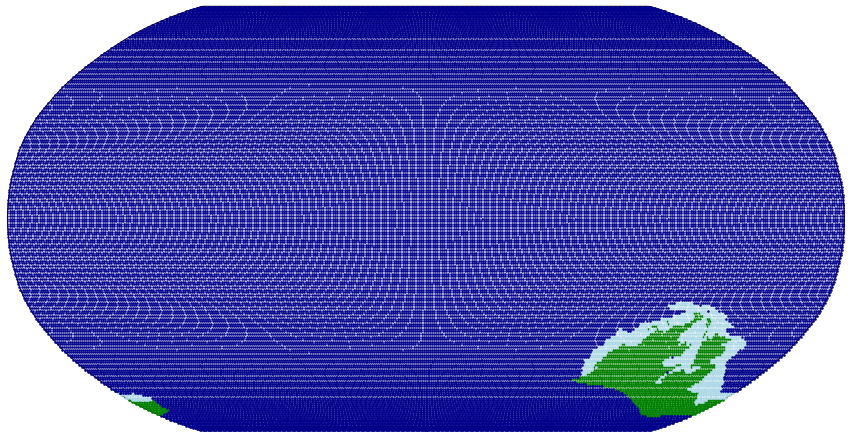

[290]


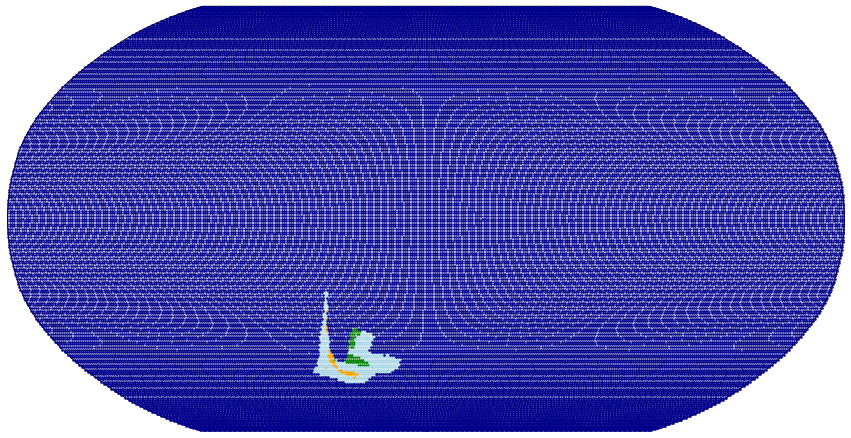

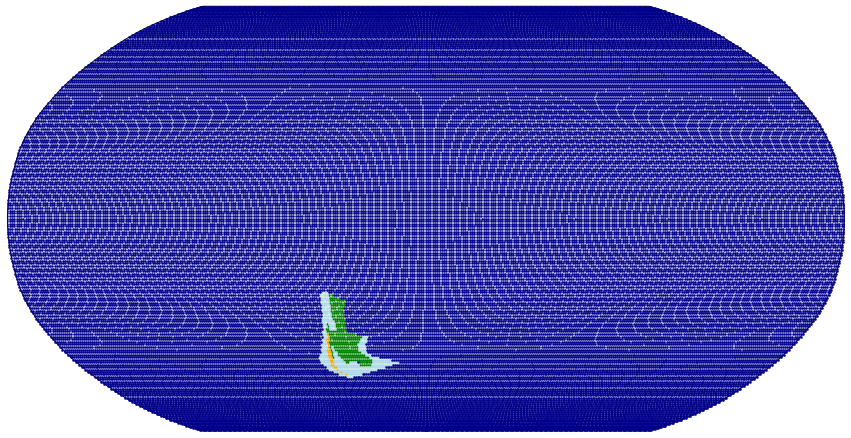

[304, 306]


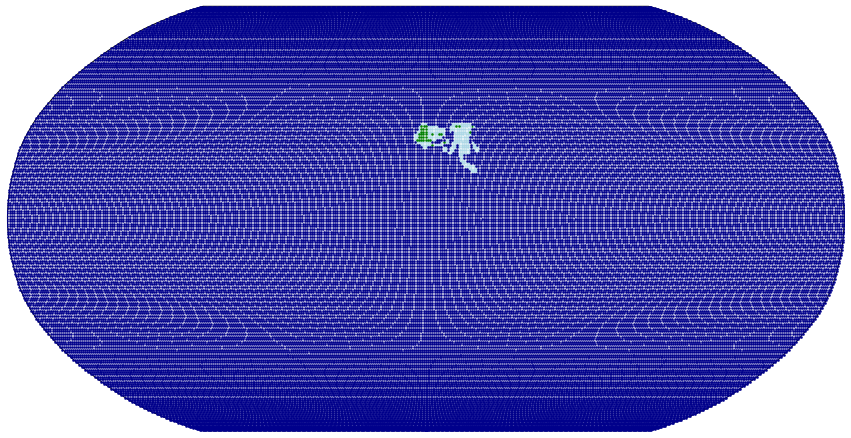

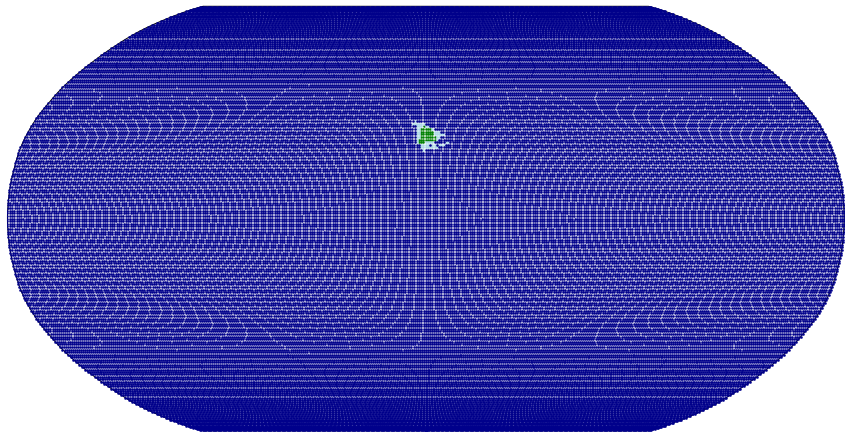

[701, 710, 712, 503]


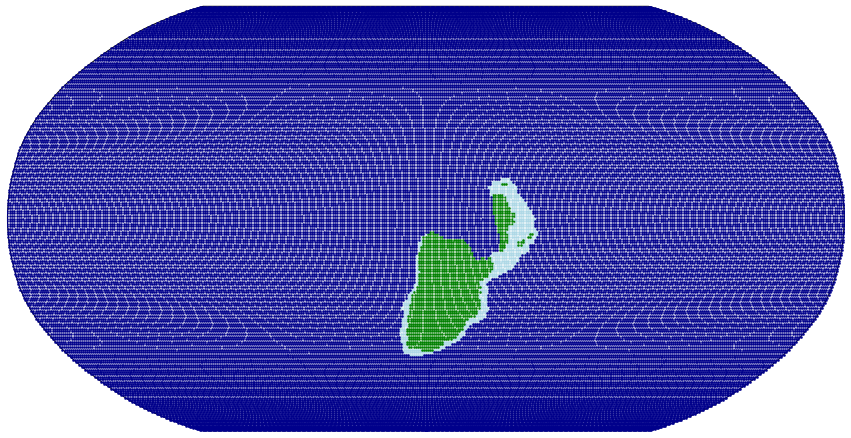

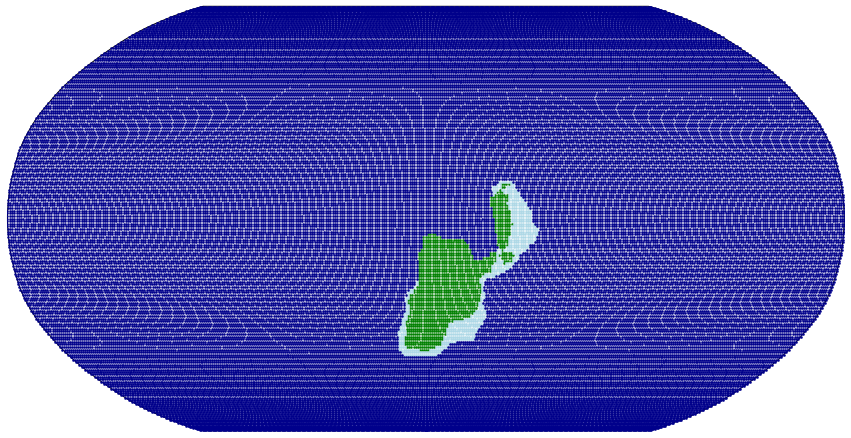

[702]


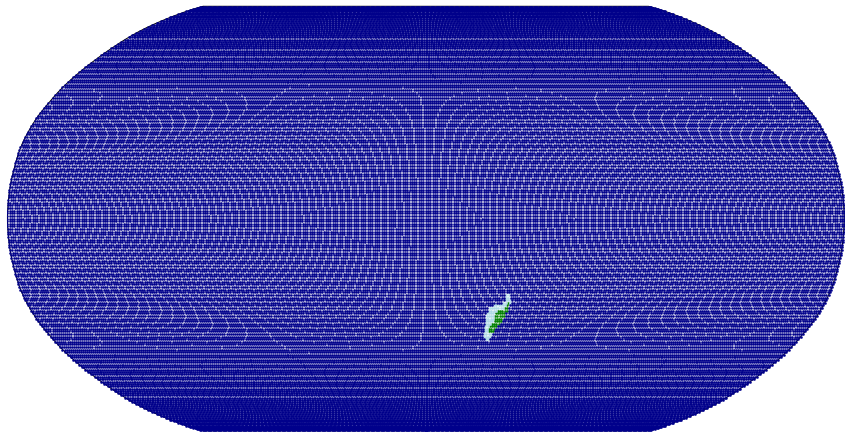

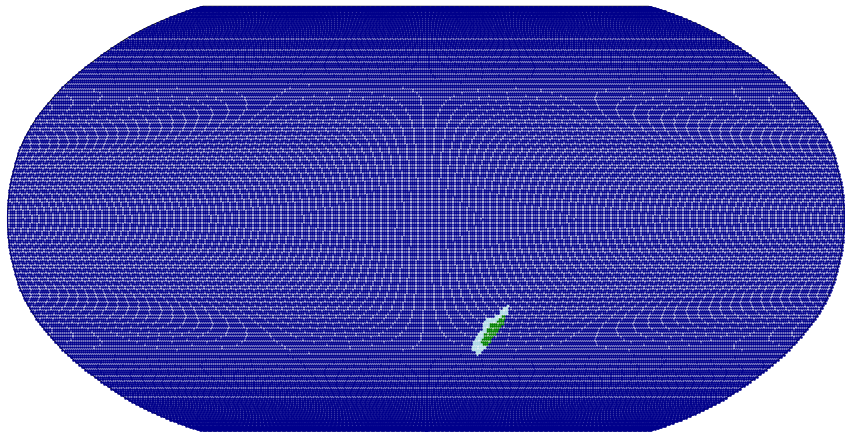

[706, 714]


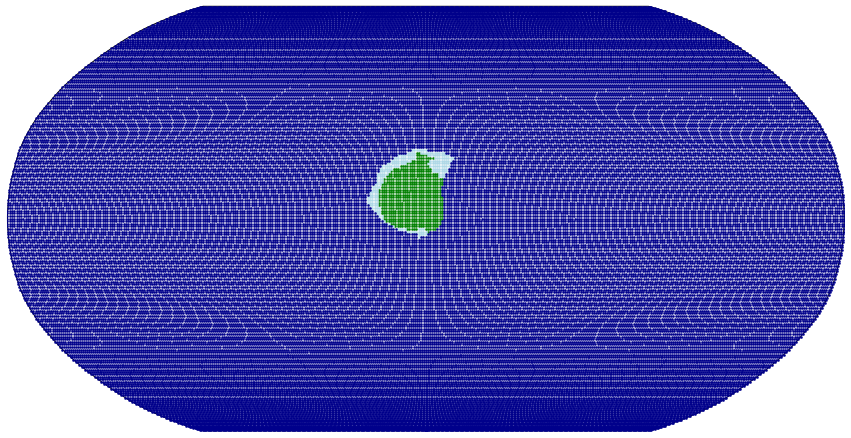

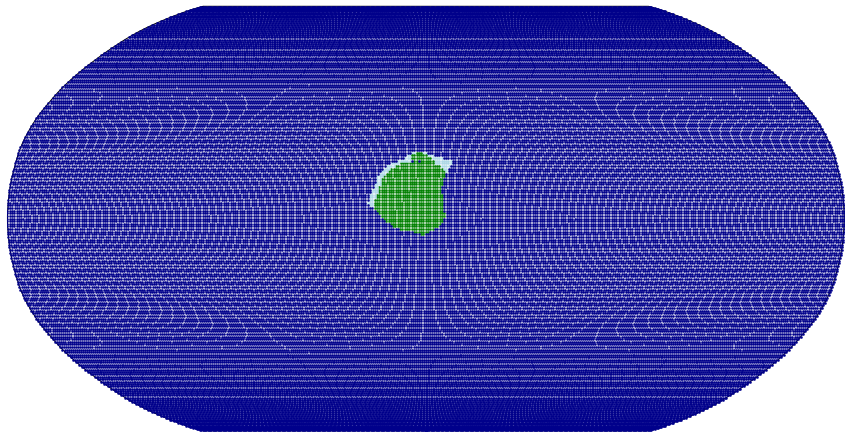

[201]


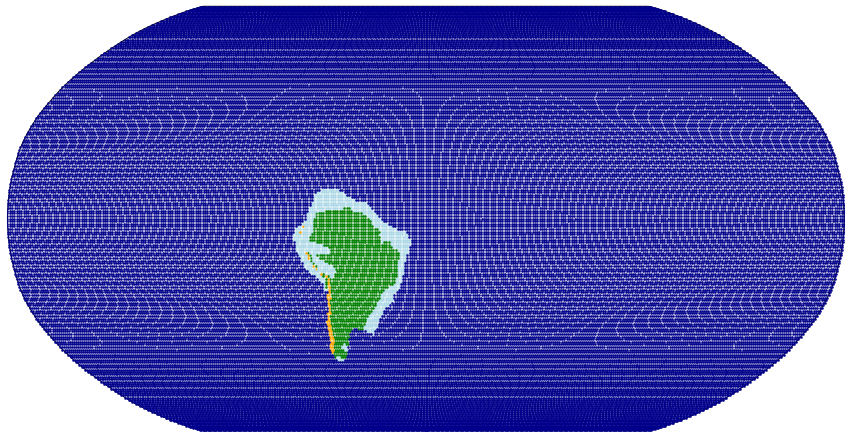

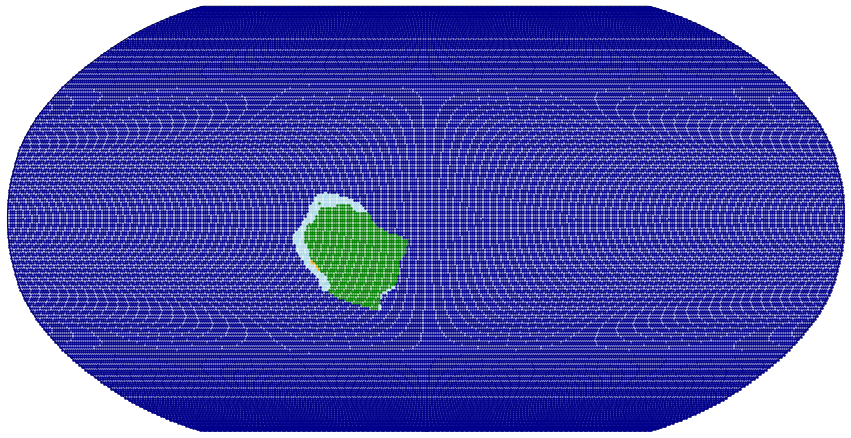

[606]


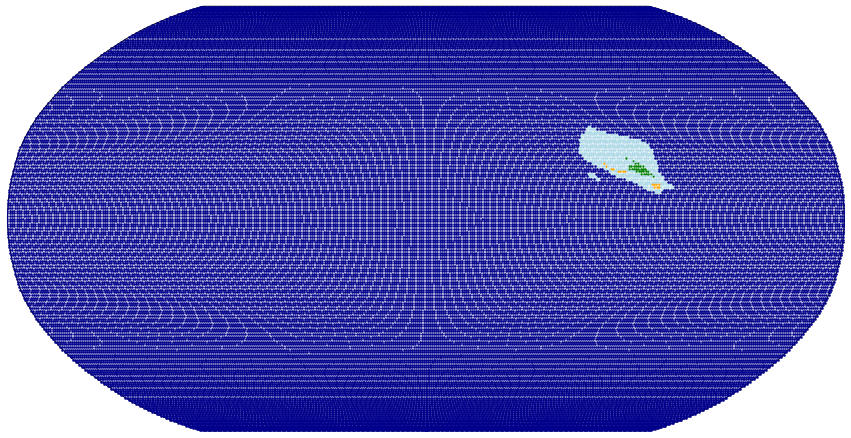

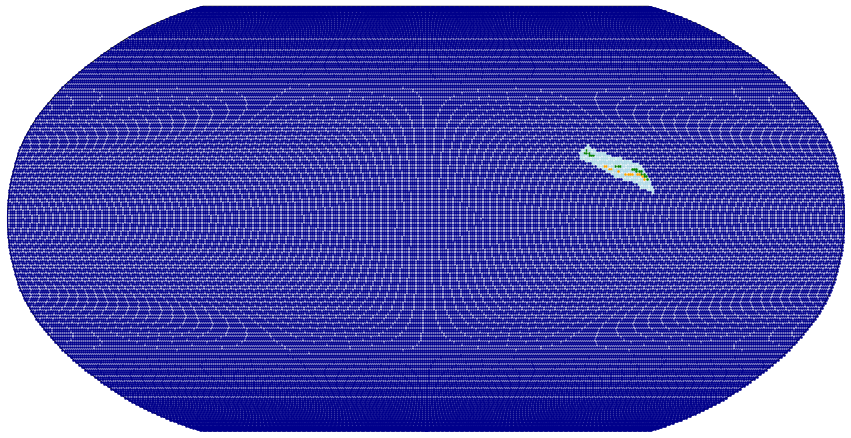

[102]


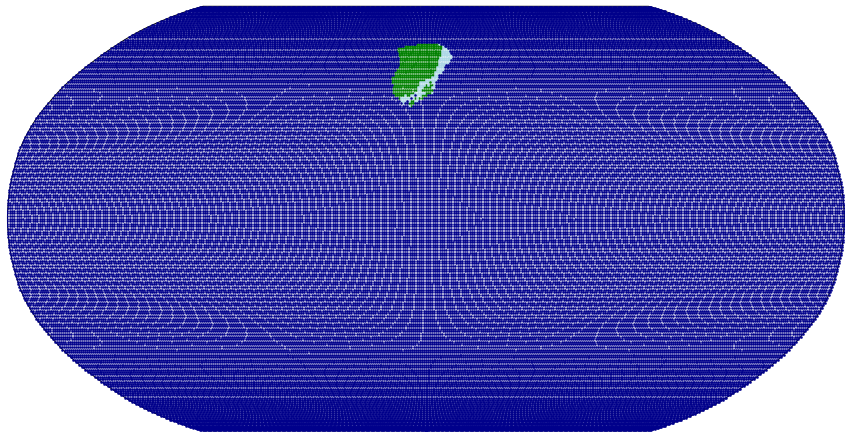

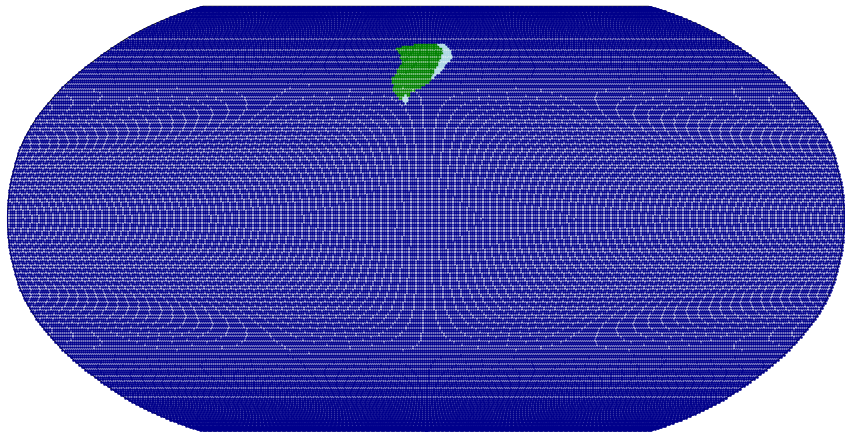

[501]


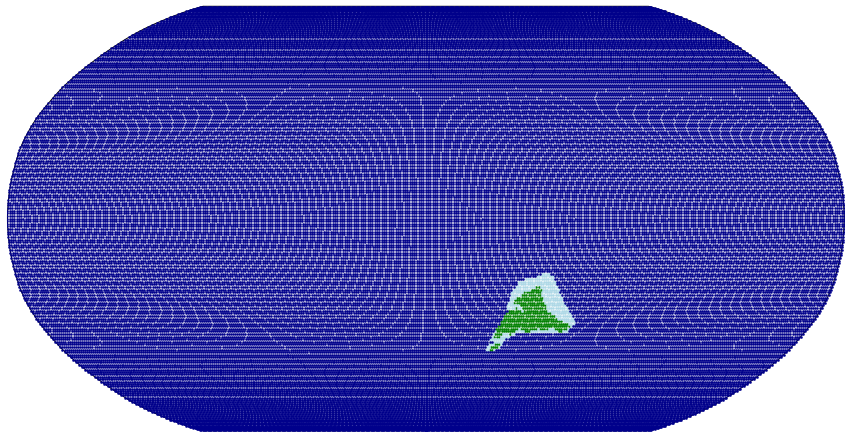

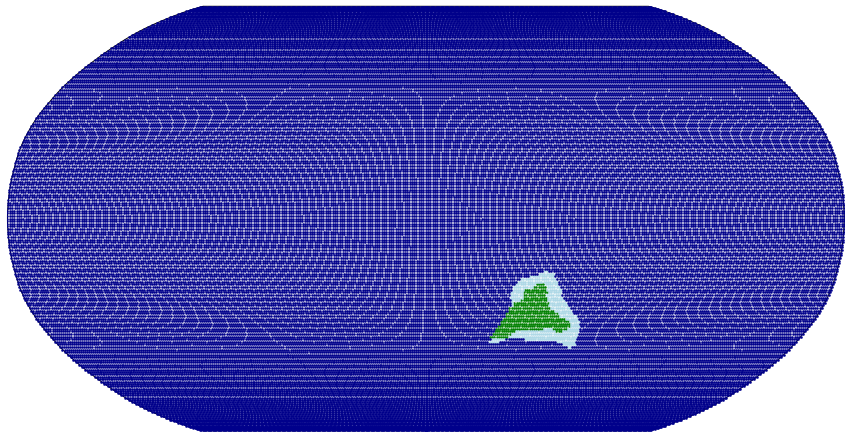

[630]


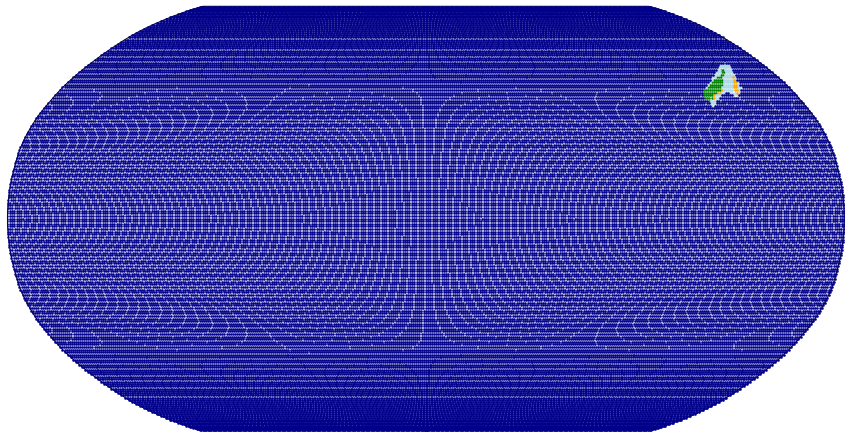

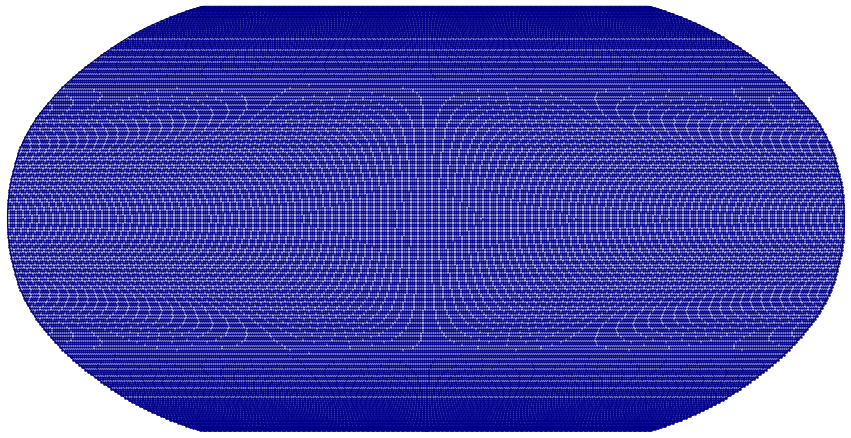

[254]


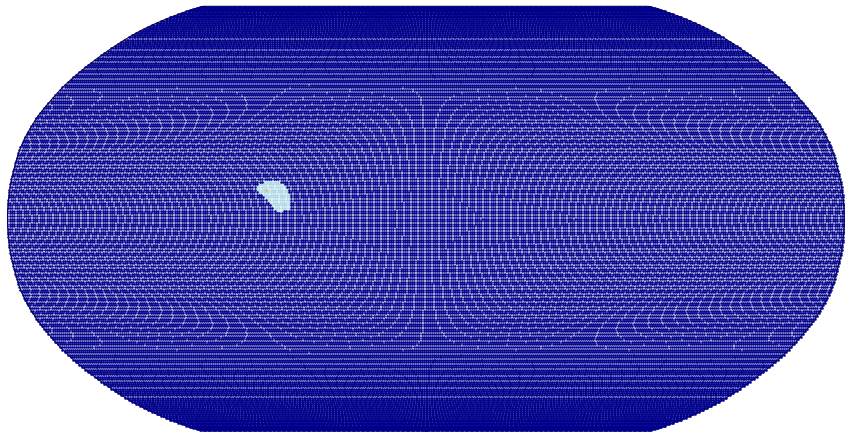

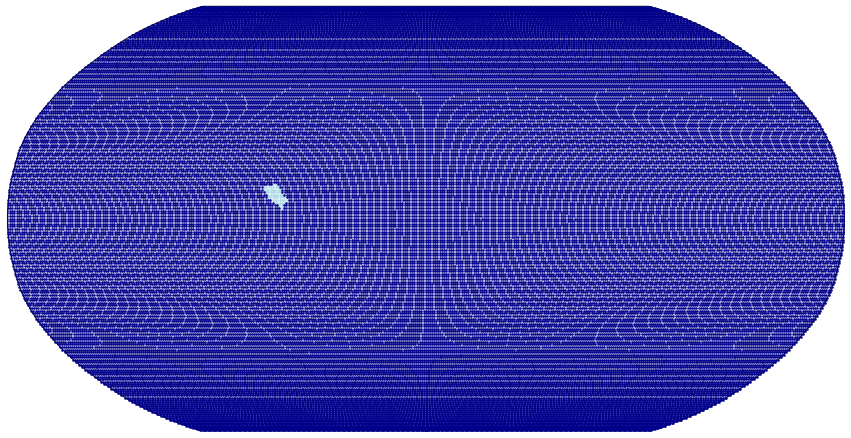

In [70]:
start_point = 8
stop_point = 9
env_color_dict = {'lm':'green',
                  'm':'orange',
                  'sm':'lightblue',
                  'i':'blue'}
    
    
for time_to,time_from in zip(time_list[start_point:stop_point],time_list[start_point+1:stop_point+1]):
    print '\nWorking on time stage %d to %d Ma' % (time_to,time_from)
    pg_dir_time_to = '%s/PresentDay_Paleogeog_Matthews2016_%dMa/' % (basedir,time_to)
    pg_features_time_to = pg.load_paleogeography(pg_dir_time_to,env_list)
    
    pg_dir_time_from = '%s/PresentDay_Paleogeog_Matthews2016_%dMa/' % (basedir,time_from)
    pg_features_time_from = pg.load_paleogeography(pg_dir_time_from,env_list)
    
    pg_features_time_from_age_reset = []
    for feature in pg_features_time_from:
        feature.set_valid_time(9999,-9999)
        pg_features_time_from_age_reset.append(feature)
    
    plate_group_lists = group_features_by_motion(pg_features_time_to,rotation_model,
                                                 time_to,time_from-time_to,plot=False)
    #print 'Number of groups for time %0.2f is %d' % (time,len(pids))
    
    reconstructed_polygons_time_to = []
    pygplates.reconstruct(pg_features_time_to,rotation_model,reconstructed_polygons_time_to,time_to)

    reconstructed_polygons_time_from = []
    # Note that in this case, we deliberately reconstruct the features that are valid at time_from,
    # but using the time_to as the time - this elliminate the motion wrt the anchor plate
    pygplates.reconstruct(pg_features_time_from_age_reset,rotation_model,reconstructed_polygons_time_from,time_to)
    
    all_grouped_features = []
    for plate_group in plate_group_lists:
        grouped_features_to_and_from = []
        for reconstructed_polygons in [reconstructed_polygons_time_to,reconstructed_polygons_time_from]:
            grouped_features = []
            for reconstructed_polygon in reconstructed_polygons:
                if reconstructed_polygon.get_feature().get_reconstruction_plate_id() in plate_group:
                    if reconstructed_polygon.get_present_day_geometry() is not None:
                        feature_to_add = reconstructed_polygon.get_feature()
                        feature_to_add.set_geometry(reconstructed_polygon.get_present_day_geometry())
                        #feature_to_add.set_valid_time(9999,-9999)
                        grouped_features.append(feature_to_add)
            grouped_features_to_and_from.append(grouped_features)
        all_grouped_features.append(grouped_features_to_and_from)
                
    print plate_group_lists            
    for plate_group,feature_list in zip(plate_group_lists,all_grouped_features):
        print plate_group

        for f in feature_list:
            pg_points = pg.rasterise_paleogeography(f,rotation_model,time_to,sampling=1.)

            plt.figure(figsize=(15,8))
    
            m = pg.paleogeography_points_basemap(pg_points,env_color_dict,fill_color='darkblue',markersize=4)

            plt.show()

